## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [2]:
file_path = r"C:\Users\saumya\OneDrive\Desktop\flights-sagemaker-project\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-06-15,Delhi,Cochin,06:00:00,21:00:00,900,1.0,No Info,7005
1,Jet Airways,2019-03-06,Banglore,New Delhi,20:35:00,08:15:00,700,1.0,No Info,16736
2,Jet Airways,2019-06-12,Delhi,Cochin,19:15:00,19:00:00,1425,1.0,In-flight meal not included,10262
3,Jet Airways,2019-03-21,Delhi,Cochin,18:25:00,18:50:00,1465,2.0,No Info,12347
4,Indigo,2019-03-21,Delhi,Cochin,06:40:00,13:20:00,400,1.0,No Info,10208
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-05-01,Kolkata,Banglore,04:40:00,07:15:00,155,0.0,No Info,4804
636,Jet Airways,2019-06-15,Banglore,Delhi,18:55:00,22:00:00,185,0.0,No Info,8016
637,Spicejet,2019-03-09,Banglore,New Delhi,05:45:00,08:35:00,170,0.0,No Info,7110
638,Jet Airways,2019-05-27,Delhi,Cochin,02:15:00,12:35:00,620,1.0,In-flight meal not included,10152


### 2.1 Fixing Data Types

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-06-15,Delhi,Cochin,2024-10-12 06:00:00,2024-10-12 21:00:00,900,1.0,No Info,7005
1,Jet Airways,2019-03-06,Banglore,New Delhi,2024-10-12 20:35:00,2024-10-12 08:15:00,700,1.0,No Info,16736
2,Jet Airways,2019-06-12,Delhi,Cochin,2024-10-12 19:15:00,2024-10-12 19:00:00,1425,1.0,In-flight meal not included,10262
3,Jet Airways,2019-03-21,Delhi,Cochin,2024-10-12 18:25:00,2024-10-12 18:50:00,1465,2.0,No Info,12347
4,Indigo,2019-03-21,Delhi,Cochin,2024-10-12 06:40:00,2024-10-12 13:20:00,400,1.0,No Info,10208
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-05-01,Kolkata,Banglore,2024-10-12 04:40:00,2024-10-12 07:15:00,155,0.0,No Info,4804
636,Jet Airways,2019-06-15,Banglore,Delhi,2024-10-12 18:55:00,2024-10-12 22:00:00,185,0.0,No Info,8016
637,Spicejet,2019-03-09,Banglore,New Delhi,2024-10-12 05:45:00,2024-10-12 08:35:00,170,0.0,No Info,7110
638,Jet Airways,2019-05-27,Delhi,Cochin,2024-10-12 02:15:00,2024-10-12 12:35:00,620,1.0,In-flight meal not included,10152


## 3. High-level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,644.812500,0.825000,9378.748438
std,488.311785,0.648098,4556.792086
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5550.250000
50%,540.000000,1.000000,8827.000000
75%,915.000000,1.000000,12727.000000
max,2185.000000,2.000000,34608.000000


In [8]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)


,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,3.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,236,281,281,352.0,501


## 4. High-level analysis of Missing Values

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [11]:
temp = pd.read_csv(r"C:\Users\saumya\Downloads\titanic (1).csv")

eda_helper_functions.missing_info(temp)

,count,percentage
variable,,
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


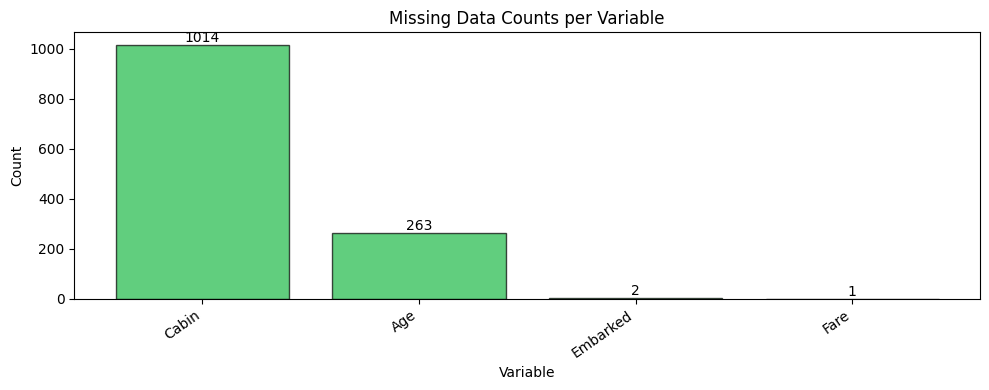

In [12]:
eda_helper_functions.plot_missing_info(temp)

## 5. High-level analysis of Outliers

In [13]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [14]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
2,Jet Airways,2019-06-12,Delhi,Cochin,2024-10-12 19:15:00,2024-10-12 19:00:00,1425,1.0,In-flight meal not included,10262,-1
3,Jet Airways,2019-03-21,Delhi,Cochin,2024-10-12 18:25:00,2024-10-12 18:50:00,1465,2.0,No Info,12347,-1
5,Indigo,2019-05-01,Banglore,Delhi,2024-10-12 18:55:00,2024-10-12 21:50:00,175,0.0,No Info,4823,-1
8,Air India,2019-06-03,Delhi,Cochin,2024-10-12 14:10:00,2024-10-12 17:10:00,180,0.0,No Info,6934,-1
9,Spicejet,2019-05-21,Mumbai,Hyderabad,2024-10-12 13:15:00,2024-10-12 14:45:00,90,0.0,No Info,2017,-1
...,...,...,...,...,...,...,...,...,...,...,...
629,Air India,2019-05-21,Kolkata,Banglore,2024-10-12 12:00:00,2024-10-12 18:30:00,1830,2.0,No Info,10151,-1
630,Indigo,2019-04-15,Delhi,Cochin,2024-10-12 14:25:00,2024-10-12 17:40:00,195,0.0,No Info,6015,-1
631,Indigo,2019-05-03,Chennai,Kolkata,2024-10-12 07:55:00,2024-10-12 10:15:00,140,0.0,No Info,3850,-1
632,Jet Airways,2019-05-18,Delhi,Cochin,2024-10-12 23:05:00,2024-10-12 04:25:00,1760,2.0,No Info,16704,-1


## 6. Pair Plots

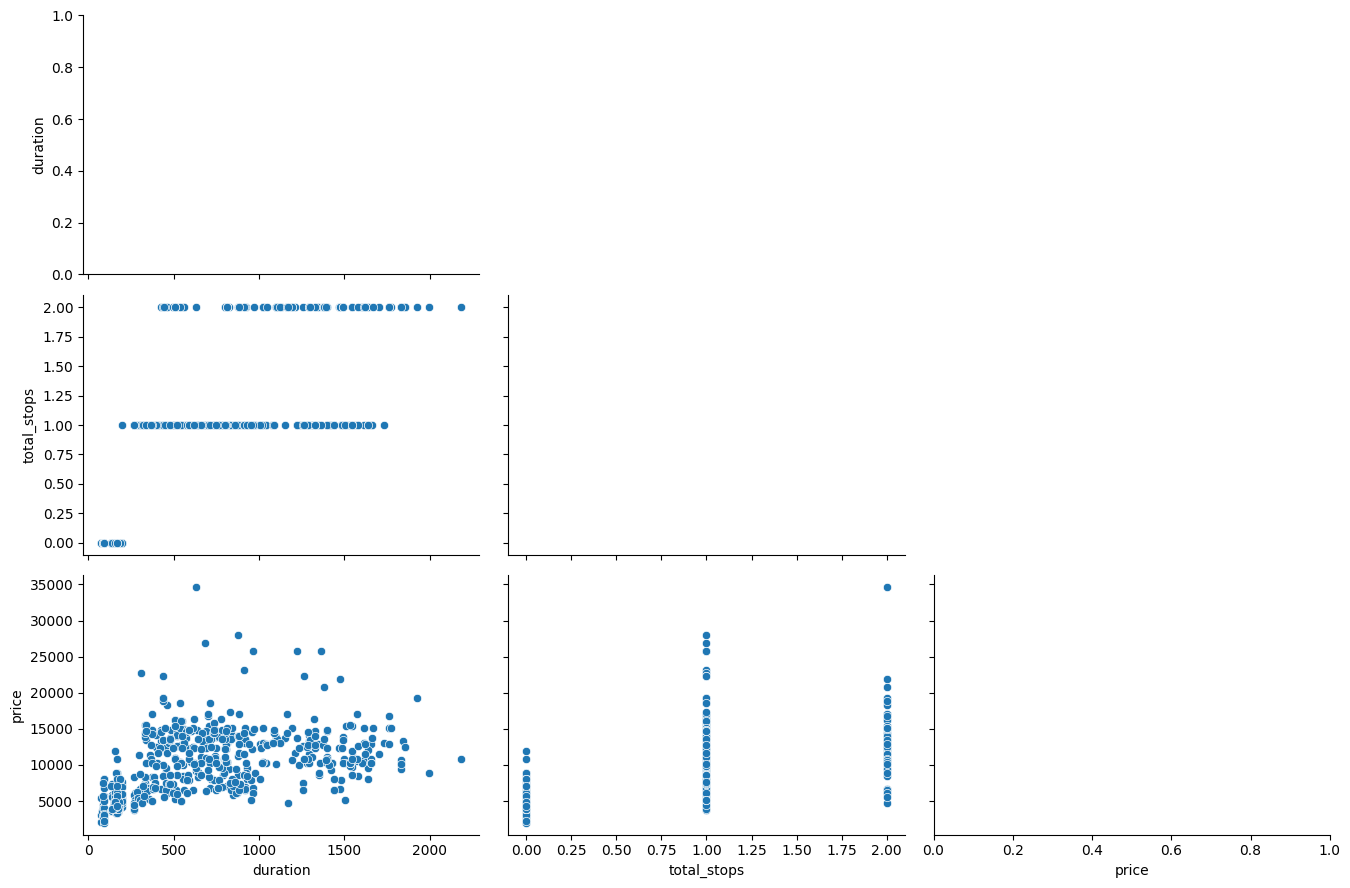

In [15]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

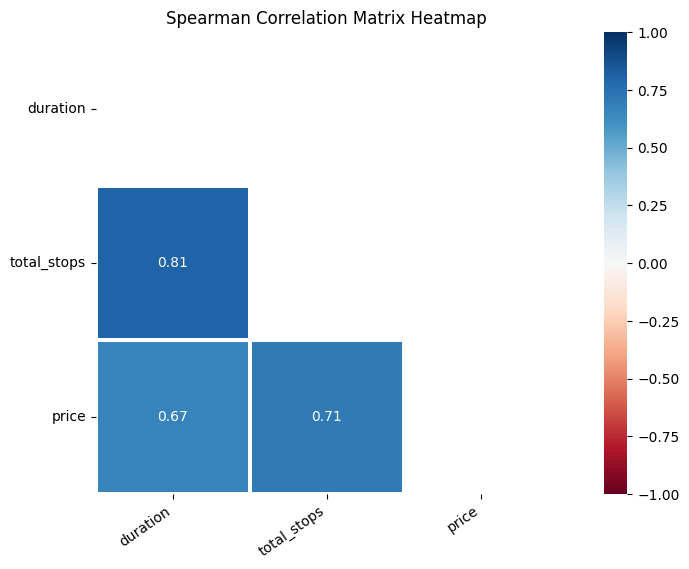

In [16]:
eda_helper_functions.correlation_heatmap(train)

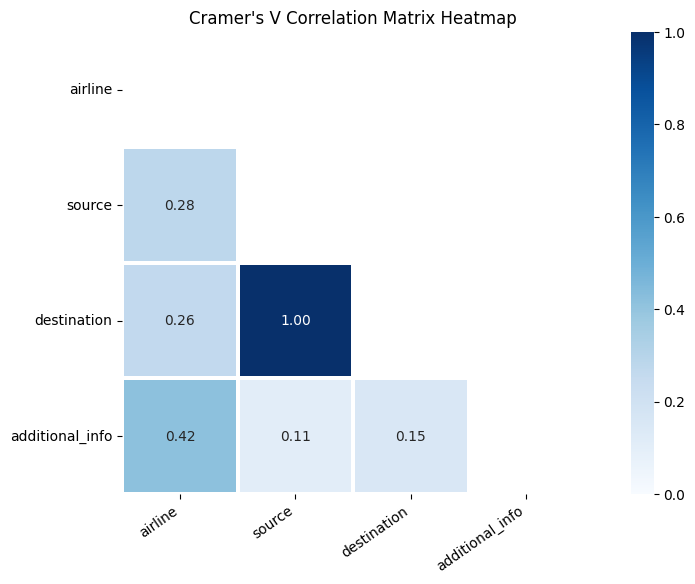

In [17]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [19]:
train.airline

0      Multiple Carriers
1            Jet Airways
2            Jet Airways
3            Jet Airways
4                 Indigo
             ...        
635               Indigo
636          Jet Airways
637             Spicejet
638          Jet Airways
639             Spicejet
Name: airline, Length: 640, dtype: object

In [20]:
eda_helper_functions.cat_summary(train, "airline")

0      Multiple Carriers
1            Jet Airways
2            Jet Airways
3            Jet Airways
4                 Indigo
             ...        
635               Indigo
636          Jet Airways
637             Spicejet
638          Jet Airways
639             Spicejet
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,236


,count,percentage
category,,
Jet Airways,236,0.368750
Indigo,114,0.178125
Air India,98,0.153125
Multiple Carriers,80,0.125000
Spicejet,57,0.089063
Vistara,22,0.034375
Air Asia,19,0.029687
Goair,13,0.020313
Trujet,1,0.001563


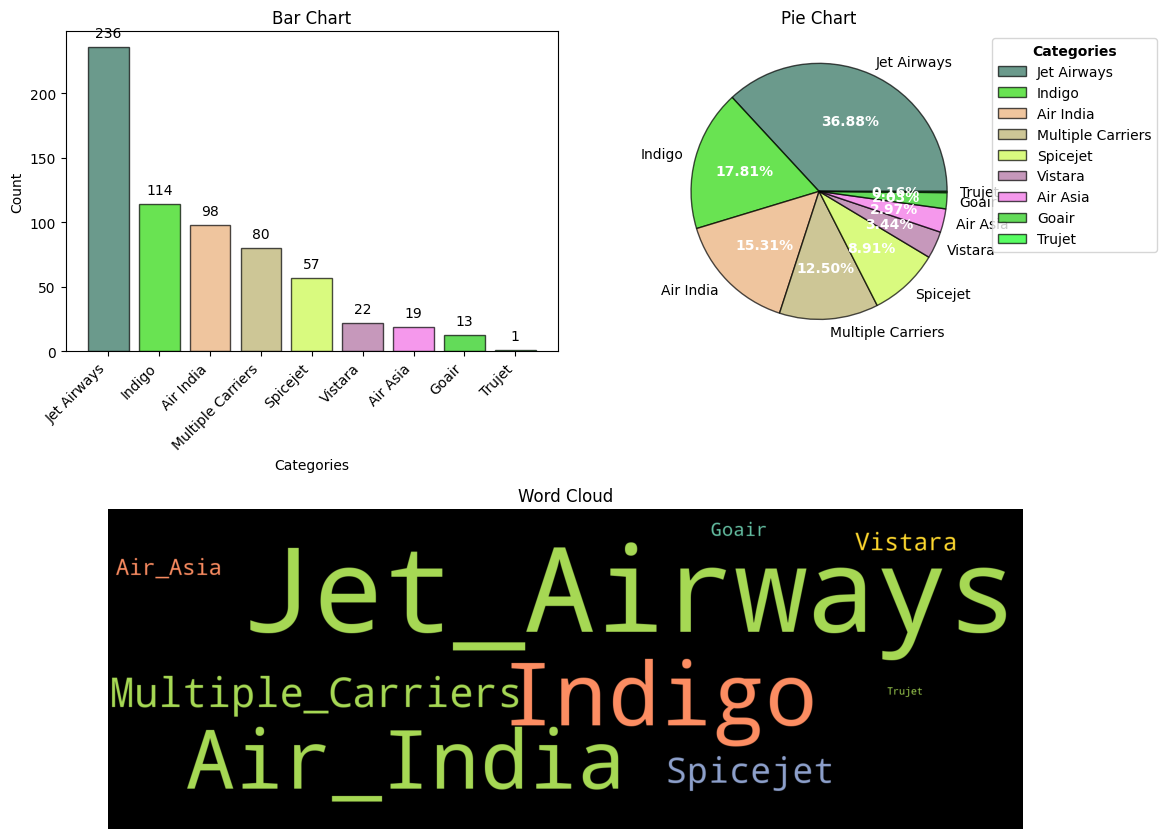

In [21]:
eda_helper_functions.cat_univar_plots(train, "airline")

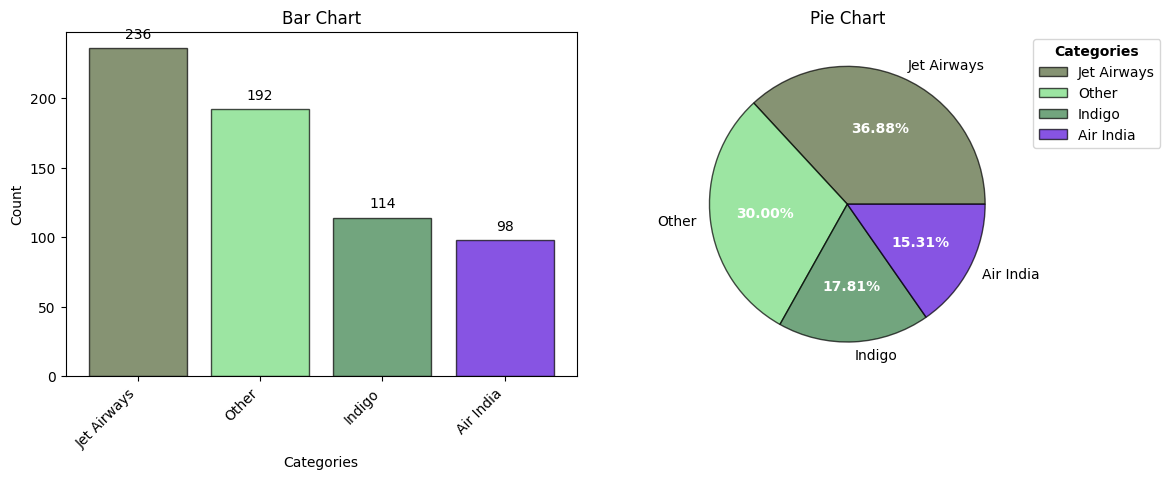

In [22]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

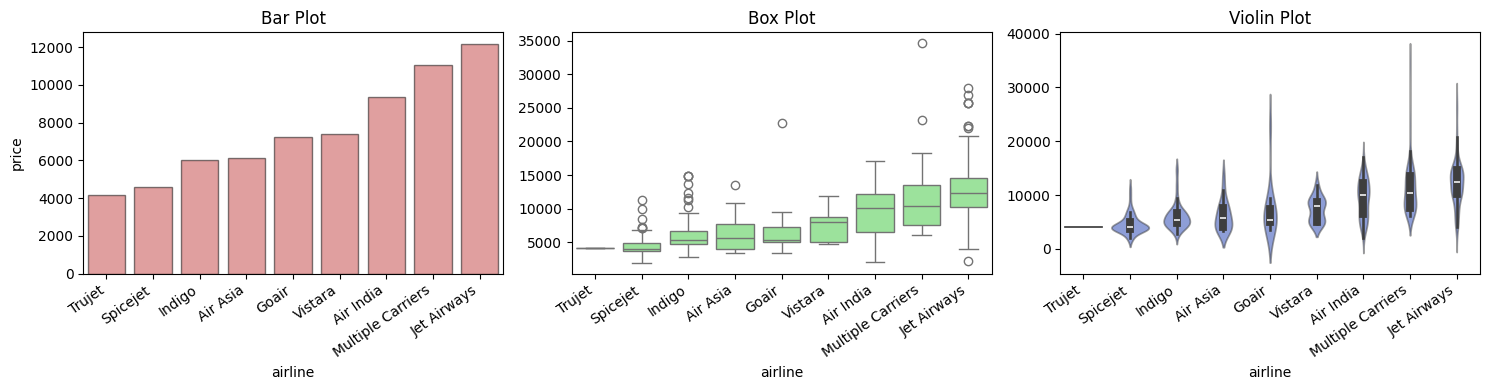

In [23]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [24]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 48.420385113509155
- p-value              : 7.770032753644961e-61
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 284.76280035662876
- p-value              : 7.176859483369604e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


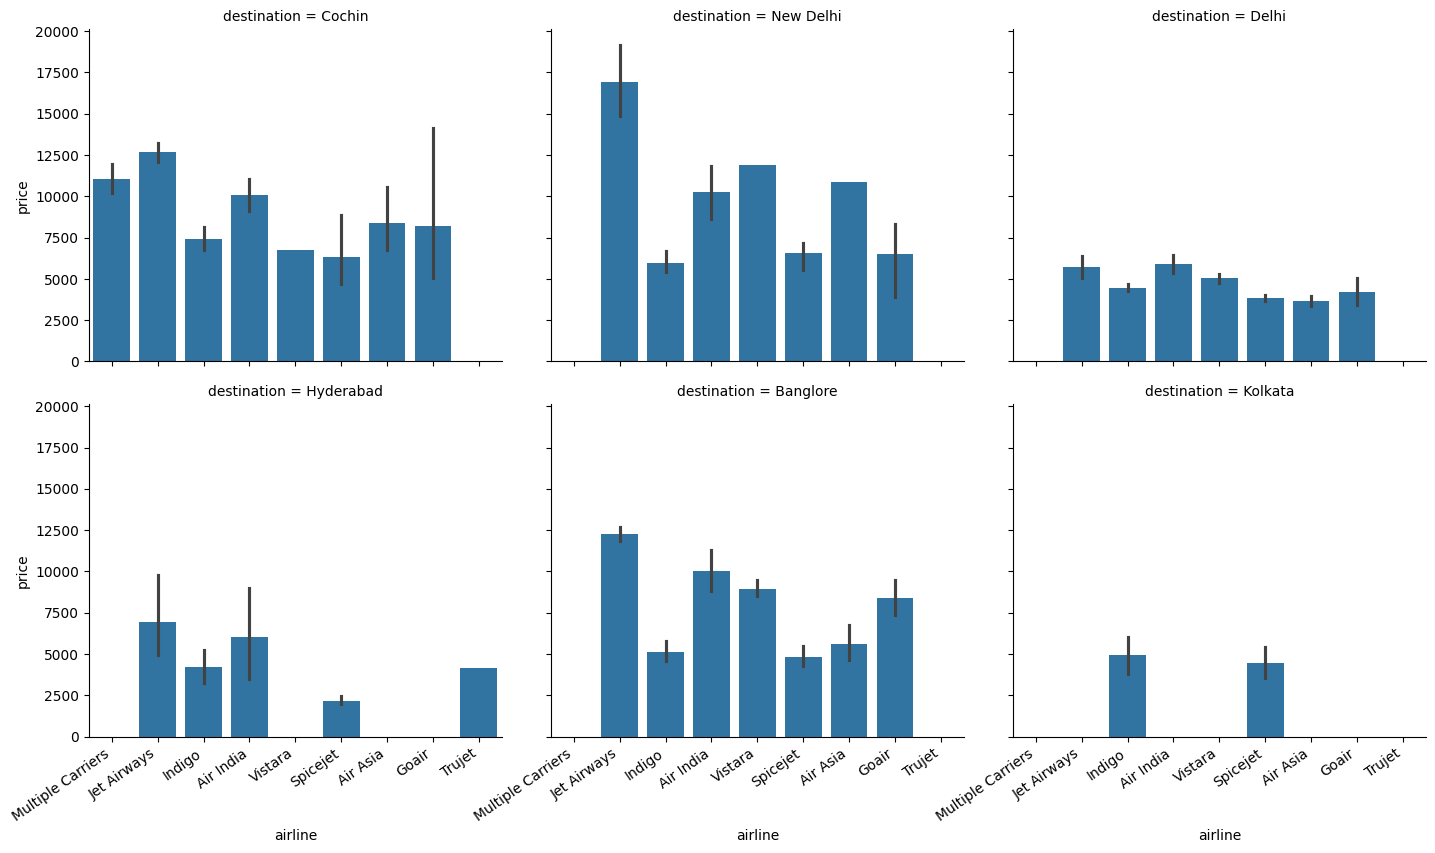

In [25]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [26]:
train.date_of_journey

0     2019-06-15
1     2019-03-06
2     2019-06-12
3     2019-03-21
4     2019-03-21
         ...    
635   2019-05-01
636   2019-06-15
637   2019-03-09
638   2019-05-27
639   2019-05-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

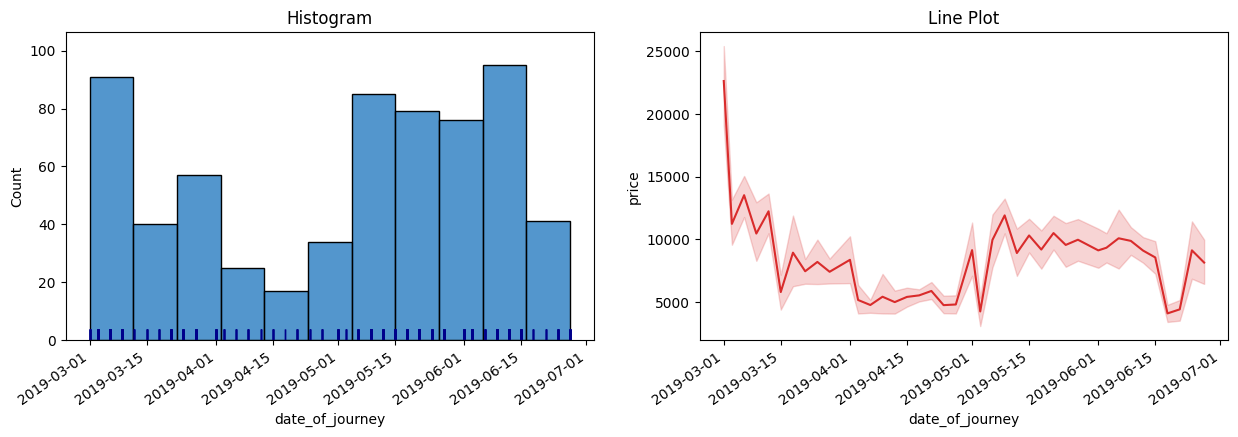

In [27]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

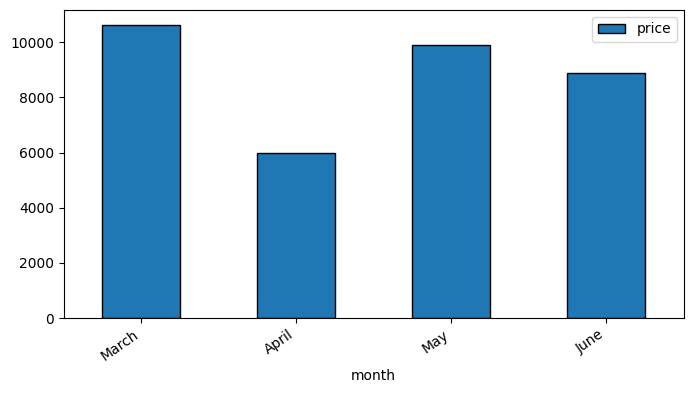

In [28]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

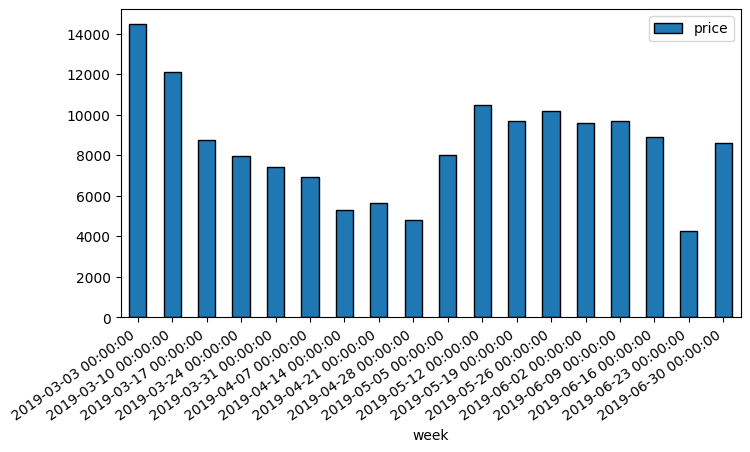

In [29]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

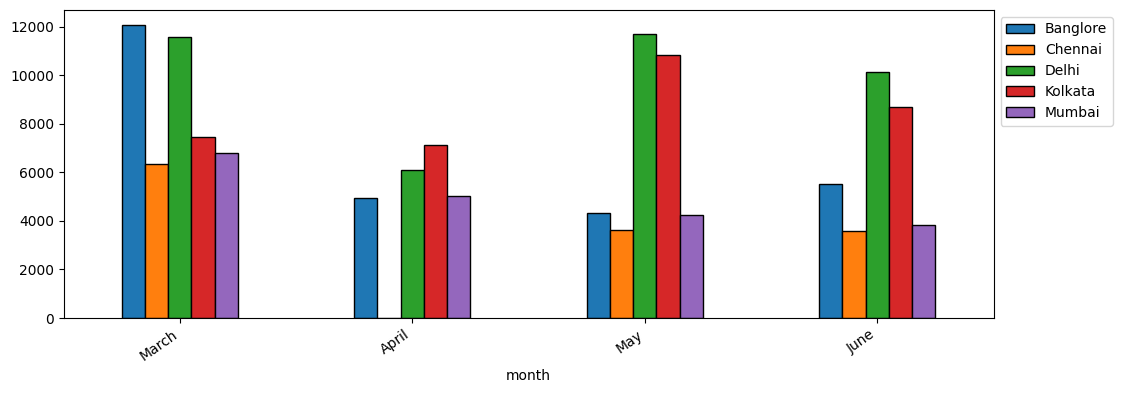

In [30]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [31]:
train.dep_time

0     2024-10-12 06:00:00
1     2024-10-12 20:35:00
2     2024-10-12 19:15:00
3     2024-10-12 18:25:00
4     2024-10-12 06:40:00
              ...        
635   2024-10-12 04:40:00
636   2024-10-12 18:55:00
637   2024-10-12 05:45:00
638   2024-10-12 02:15:00
639   2024-10-12 09:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

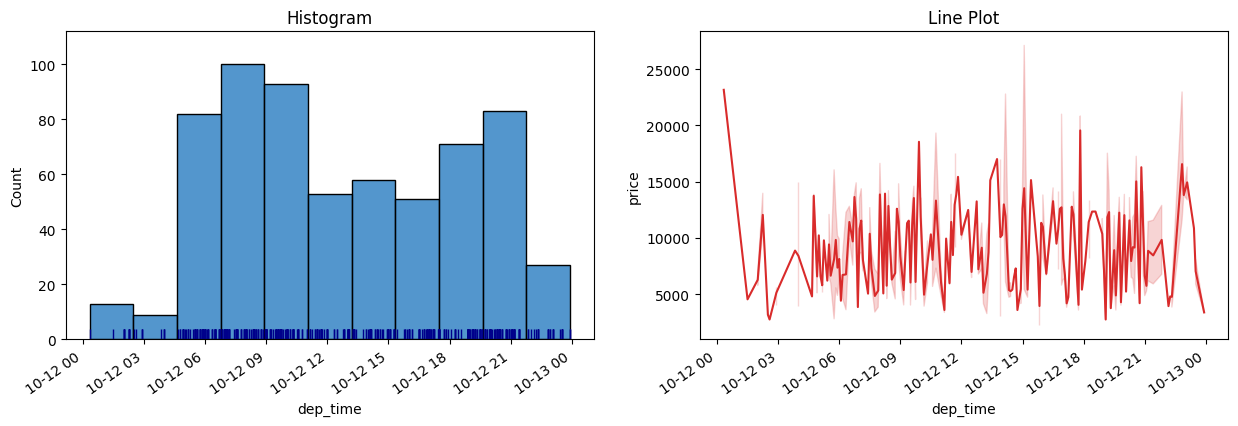

In [32]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

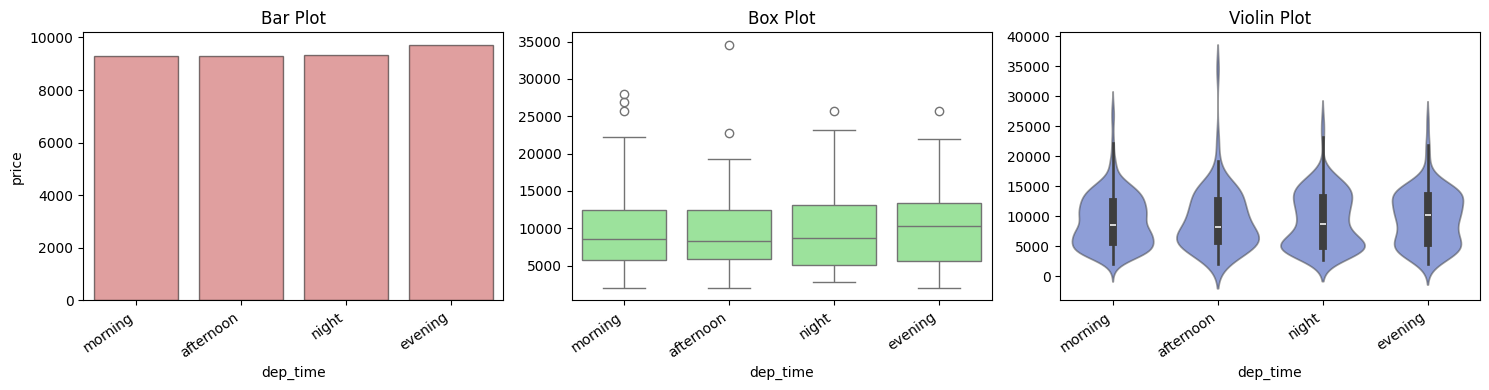

In [33]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [34]:
train.duration

0       900
1       700
2      1425
3      1465
4       400
       ... 
635     155
636     185
637     170
638     620
639     170
Name: duration, Length: 640, dtype: int64

In [35]:
eda_helper_functions.num_summary(train, "duration")

0       900
1       700
2      1425
3      1465
4       400
       ... 
635     155
636     185
637     170
638     620
639     170
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,135.0
10,154.5
25,175.0
50,540.0
75,915.0
90,1426.5
95,1580.0
99,1830.0


,value
mean,644.812500
trimmed mean (5%),615.034722
trimmed mean (10%),588.144531
median,540.000000


,value
var,238448.399844
std,488.311785
IQR,740.000000
mad,370.000000
coef_variance,0.757293


,value
skewness,0.781137
kurtosis,-0.402828


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.0258759973025277e-20
Test Statistic       : 0.8976105640872751
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 20.90852524008119
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [36]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.0
0.50    540.0
0.75    915.0
Name: duration, dtype: float64

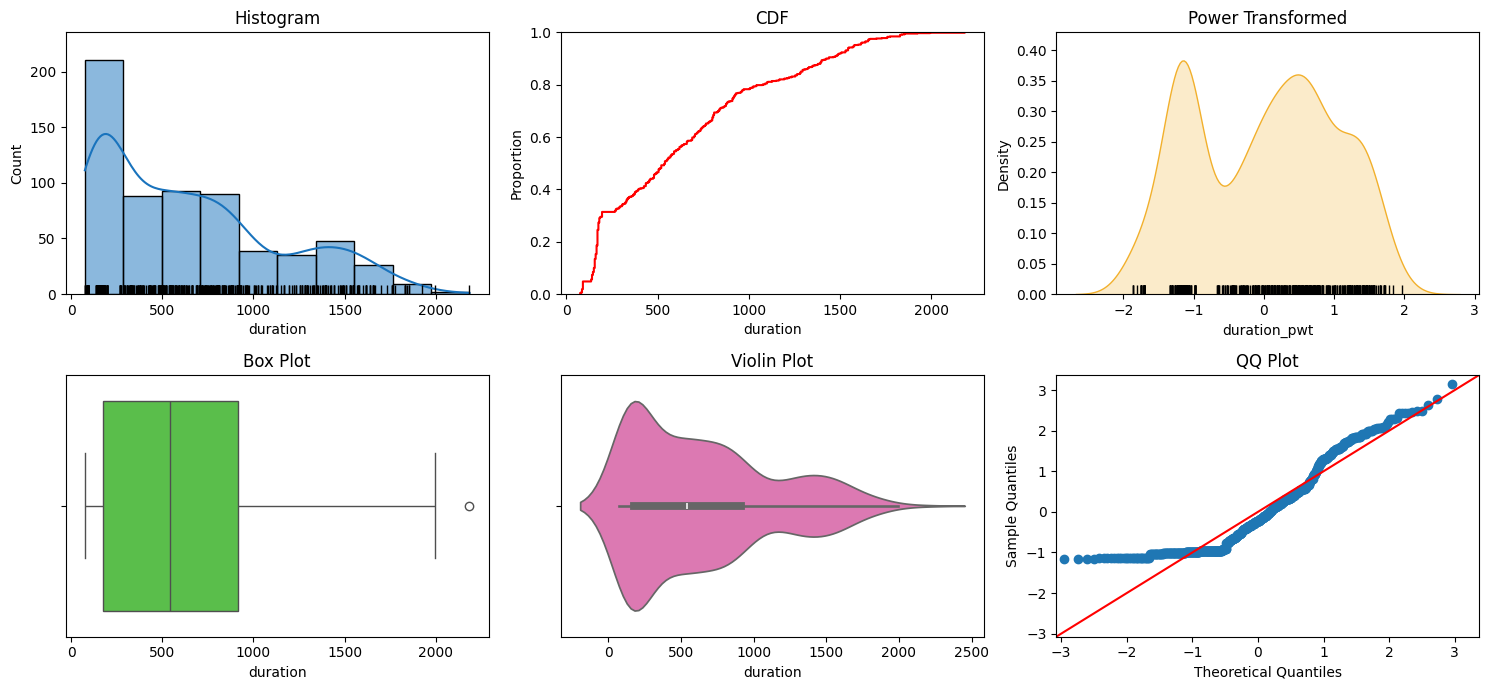

In [37]:
eda_helper_functions.num_univar_plots(train, "duration")

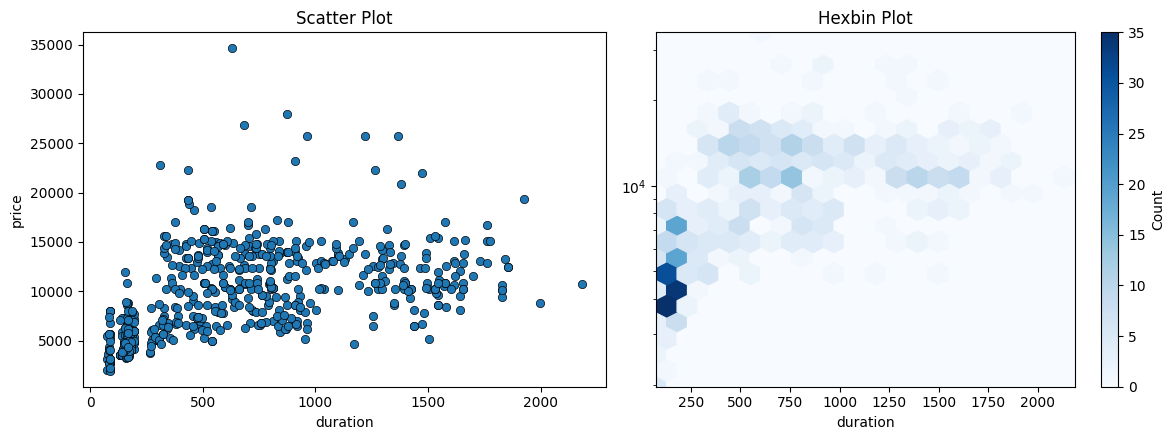

In [38]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [39]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5279874337873479
- p-value              : 3.165149546216324e-47
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6712223964173262
- p-value              : 5.145223140974248e-85
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


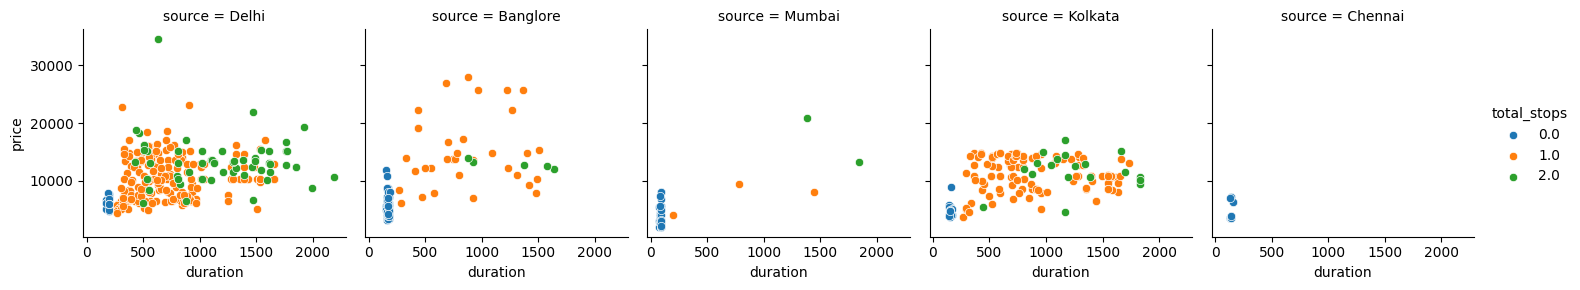

In [40]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

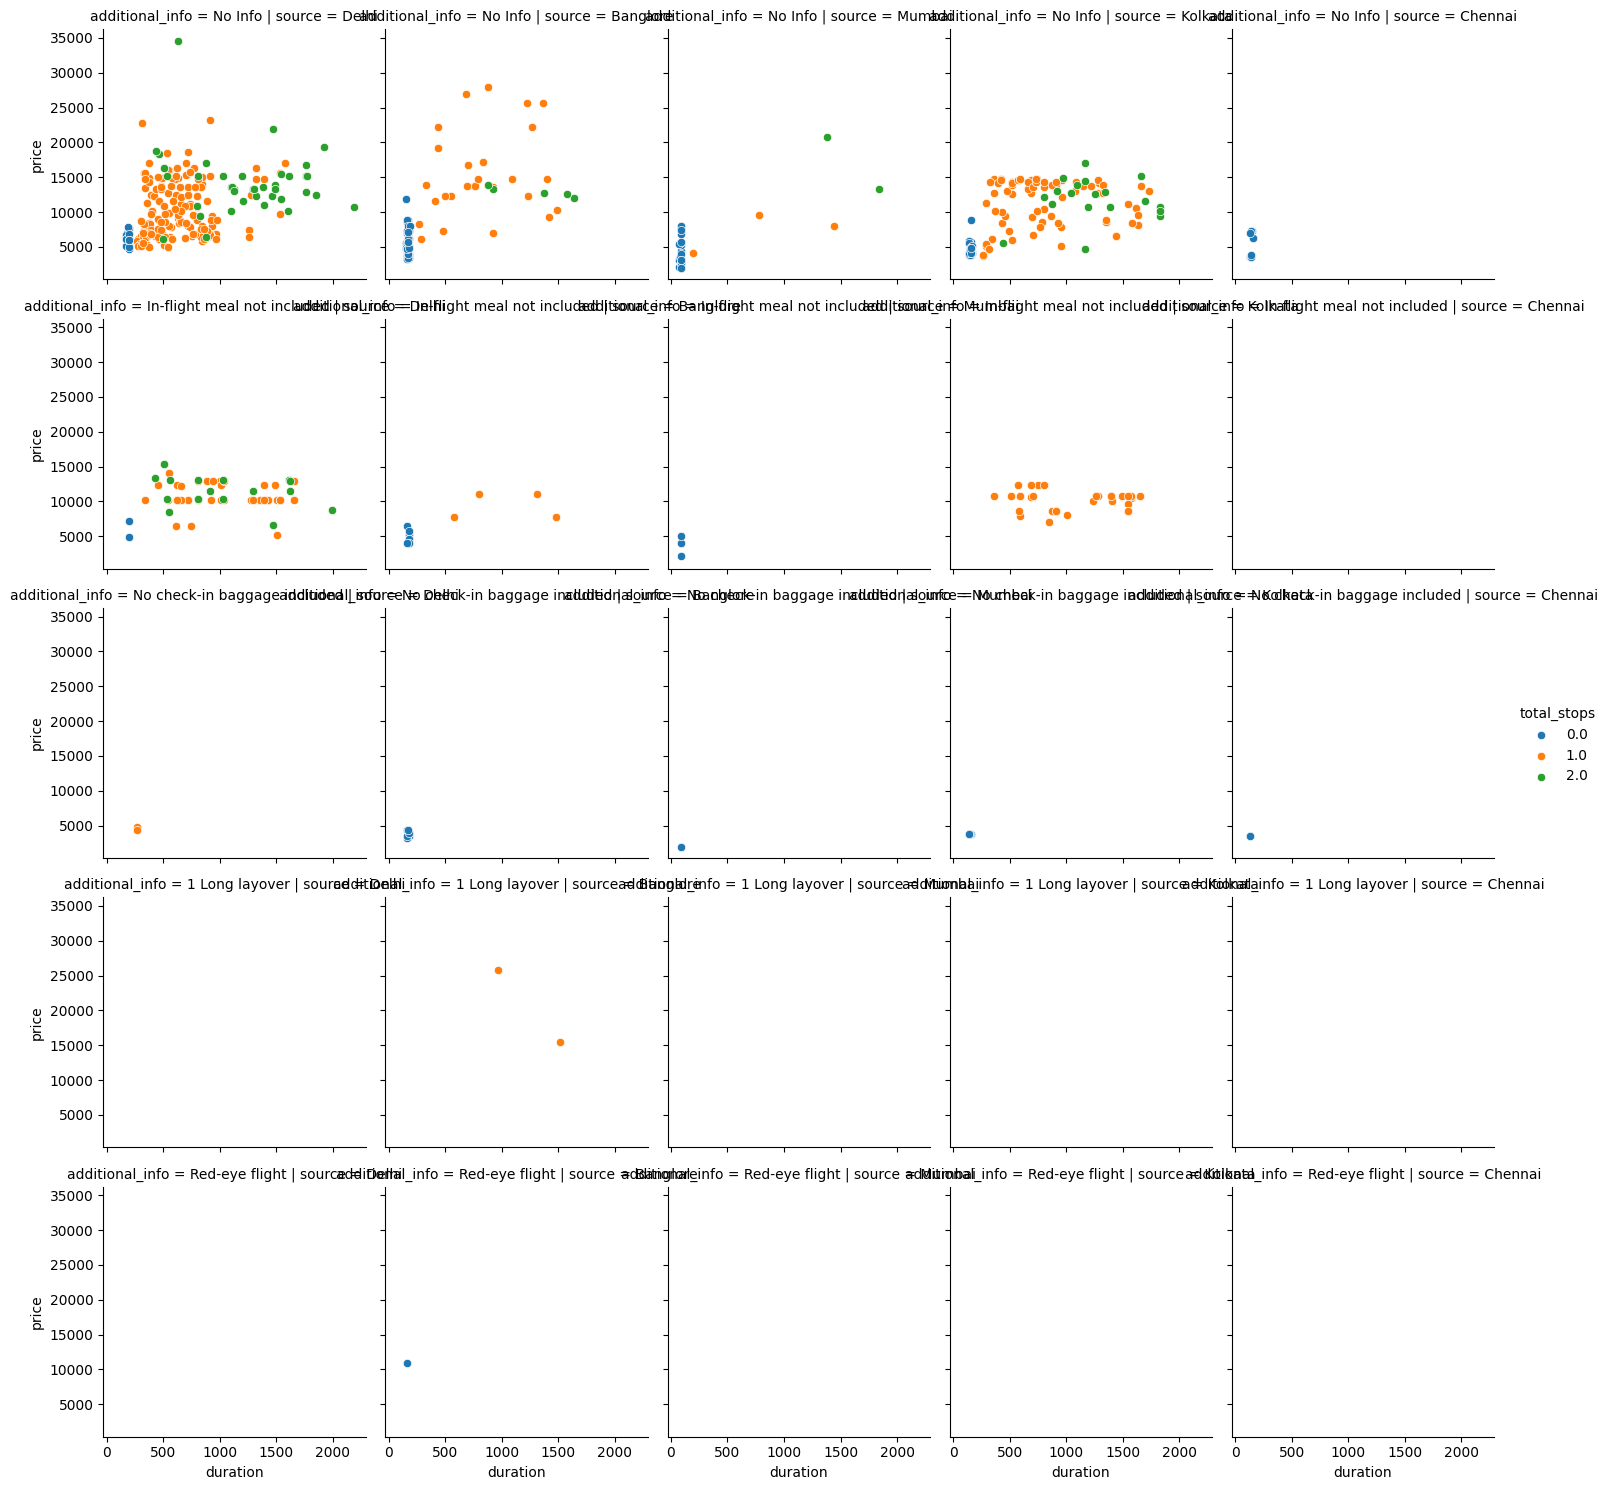

In [41]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [42]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -935.0
Upper Limit : 2025.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
528,Air India,2019-03-21,Delhi,Cochin,2024-10-12 06:50:00,2024-10-12 19:15:00,2185,2.0,No Info,10756


### 8.5 additional_info

In [43]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2       In-flight meal not included
3                           No Info
4                           No Info
                   ...             
635                         No Info
636                         No Info
637                         No Info
638     In-flight meal not included
639    No check-in baggage included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,501


,count,percentage
category,,
No Info,501,0.782813
In-flight meal not included,117,0.182812
No check-in baggage included,19,0.029687
1 Long layover,2,0.003125
Red-eye flight,1,0.001563


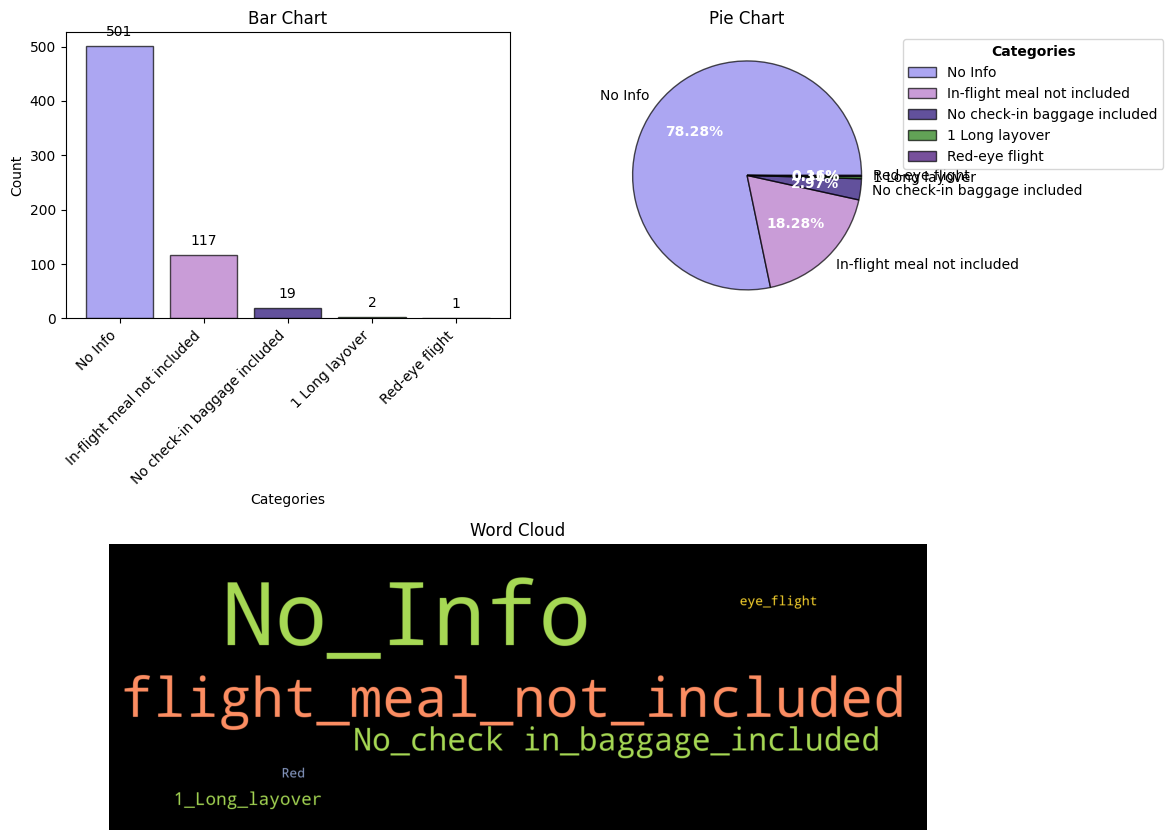

In [44]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

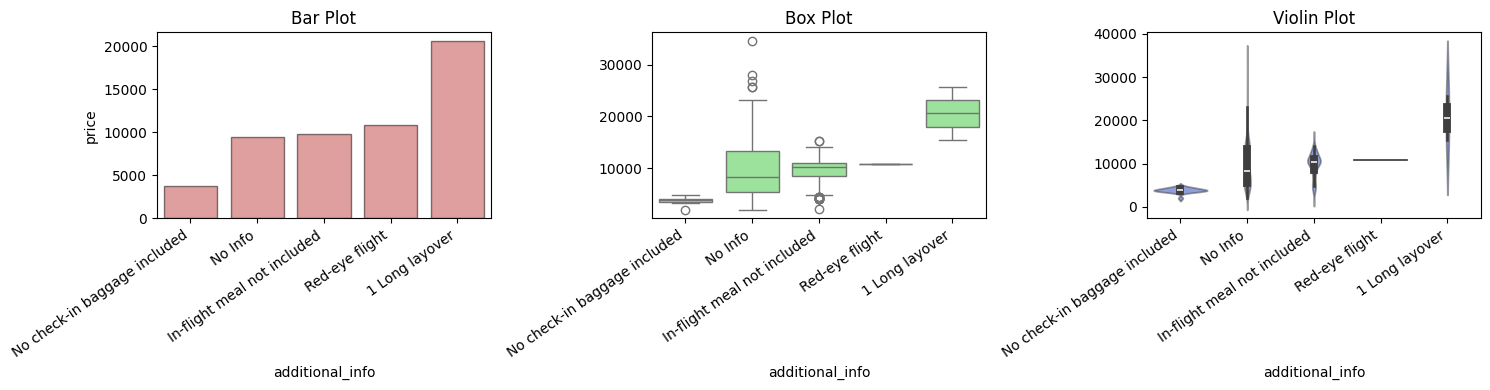

In [45]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

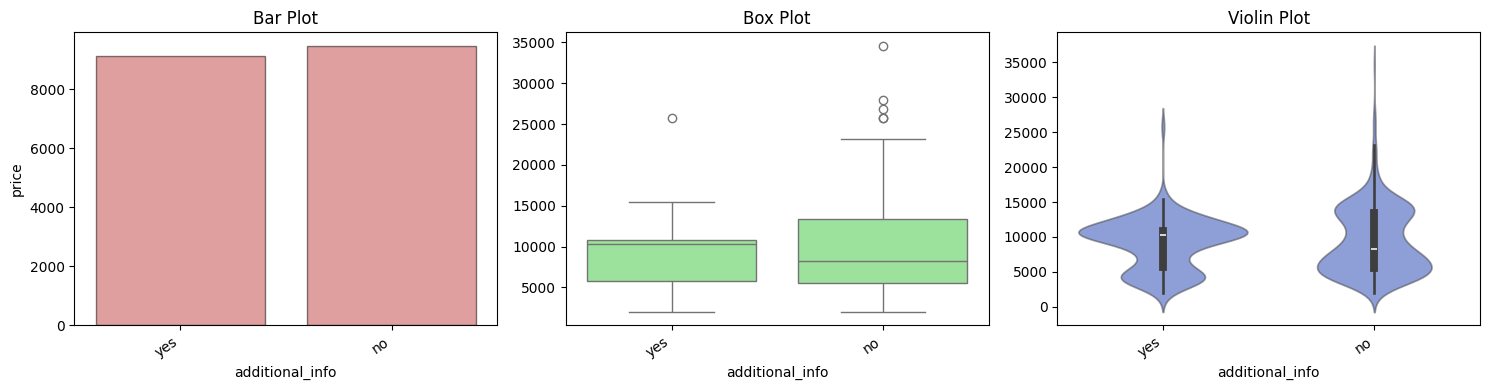

In [46]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- `additional_info` has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [48]:
!pip install ydata_profiling

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ------------ --------------------------- 4.7/15.6 MB 23.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.0/15.6 MB 23.9 MB/s eta 0:00:01
   -------------------------------------- - 14.9/15.6 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 15.6/15.6 MB 20.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   --------------------------------------- 666.4/666.4 kB 27.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 21.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--

In [50]:
!pip install numpy==2.0.0


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.2 MB 10.5 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.2 MB 12.0 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.2 MB 12.3 MB/s eta 0:00:01
   ----------------------- ---------------- 9.7/16.2 MB 12.6 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.2 MB 12.9 MB/s eta 0:00:01
   -------------------------------------- - 15.5/16.2 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
#import numpy as np
#print(np.__version__)

In [ ]:
#!pip uninstall numpy


In [ ]:
#!pip install numpy==2.0.0